# HW6
## Yidan Wang 2973331278

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

#### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


raw_data = pd.read_csv('../data/wdbc.data', header=None)

x_data = raw_data.iloc[:,2:]
y = raw_data.iloc[:,1]


supervised learning:
The best parameters C of supervised learning are 1.0 with a CV score of 0.98
The Confusion Matrix of train data is 


,predicted benign,predicted malignant
real benign,285,0
real maligant,4,166


The Confusion Matrix of test data is 


,predicted benign,predicted malignant
real benign,71,1
real maligant,2,40


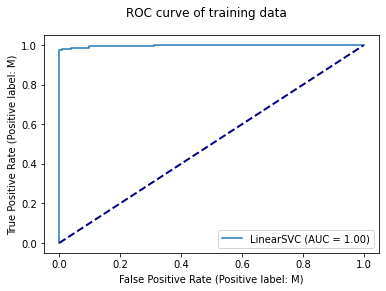

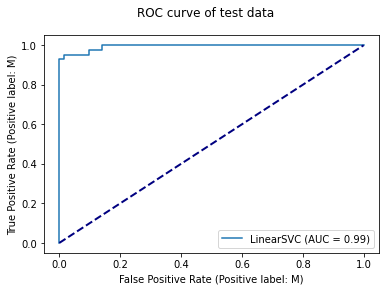

In [2]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


def CV_processing_1(X_train, y_train):
    C_range = np.logspace(-3, 6, 10)
    param_grid = dict(C=C_range)
    grid = GridSearchCV(LinearSVC(penalty="l1", dual=False, max_iter=10000), param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_params_['C'], grid.best_score_

def estimate_index(X_train, X_test, y_train, y_test, model):
   
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    a_test = accuracy_score(y_test, y_pred_test)
    a_train = accuracy_score(y_train, y_pred_train)
    
    p_test = precision_score(y_test, y_pred_test, pos_label = "M")
    p_train = precision_score(y_train, y_pred_train, pos_label = "M")
    
    r_test = recall_score(y_test, y_pred_test, pos_label = "M")
    r_train = recall_score(y_train, y_pred_train, pos_label = "M")

    f1_test = f1_score(y_test, y_pred_test, pos_label = "M")
    f1_train = f1_score(y_train, y_pred_train, pos_label = "M")
    
    auc_test = roc_auc_score(y_test, model.decision_function(X_test))
    auc_train = roc_auc_score(y_train, model.decision_function(X_train))

    return [a_test, a_train, p_test, p_train, r_test, r_train, f1_test, f1_train, auc_test, auc_train], y_pred_train, y_pred_test

def normal_data(X_train, X_test):
    scaler = MinMaxScaler()
    scaler.fit(X_train)                   
    x_train_1 = scaler.transform(X_train)
    x_test_1 = scaler.transform(X_test)
    return x_train_1, x_test_1

def cm(y, y_pred):
    cm = confusion_matrix(y, y_pred, labels=["B", "M"])
    cm_df = pd.DataFrame(cm, columns=["predicted benign","predicted malignant"], index=["real benign", "real maligant"])
    return cm_df
    
# Monte-Carlo Simulation 30 times

def make_null_list():
    all_list = []
    for i in range(0,10):
        all_list.append([])
    return all_list

def avg_index(index_list, all_list):
    for i in range(len(index_list)):
        all_list[i].append(index_list[i])
    return all_list


all_list = make_null_list()

print("supervised learning:")
for m in range(0,30):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=m, stratify=y)
    x_train_1, x_test_1 = normal_data(X_train, X_test)
    
    c, cv_score = CV_processing_1(x_train_1, y_train)
    model1 = LinearSVC(penalty="l1", C=c, dual=False, max_iter=10000)
    model1.fit(x_train_1, y_train)
    index_list, y_pred_train, y_pred_test = estimate_index(x_train_1, x_test_1, y_train, y_test, model1)

    all_list = avg_index(index_list, all_list)

    if m == 0:
        
        print("The best parameters C of supervised learning are %s with a CV score of %0.2f" % (c, cv_score))
        cm_train = cm(y_train, y_pred_train)
        cm_test = cm(y_test, y_pred_test)

        print("The Confusion Matrix of train data is ")
        display(cm_train)
        print("The Confusion Matrix of test data is ")
        display(cm_test)
        
        disp_train = RocCurveDisplay.from_estimator(model1, x_train_1, y_train, pos_label="M")
        disp_train.figure_.suptitle("ROC curve of training data")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.show()
        
        
        disp_test = RocCurveDisplay.from_estimator(model1, x_test_1, y_test, pos_label="M")
        disp_test.figure_.suptitle("ROC curve of test data")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.show()

#### Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs.

In [3]:
ave_1 = []
name_list = ["accu_test", "accu_train", "prec_test", "prec_train", 'recall_test', 'recall_train', 'f1_test', 'f1_train', 'auc_test', 'auc_train']
for i in range(len(all_list)):
    ave_1.append(np.mean(all_list[i]))
res_1=pd.DataFrame(ave_1, index = name_list, columns = ["supervised learning"])
display(res_1)

,supervised learning
accu_test,0.965789
accu_train,0.984982
prec_test,0.971728
prec_train,0.989023
recall_test,0.934921
recall_train,0.970588
f1_test,0.952528
f1_train,0.979697
auc_test,0.992769
auc_train,0.997507


#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### A. Train an L1 -penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the ﬁnal SVM on the test data and the average accuracy, precision, recall, F1 -score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

semi-supervised learning:
The best parameters C of supervised learning are {'svm__C': 1.0} with a CV score of 0.98
The Confusion Matrix of train data is 


,predicted benign,predicted malignant
real benign,283,2
real maligant,5,165


The Confusion Matrix of test data is 


,predicted benign,predicted malignant
real benign,71,1
real maligant,2,40


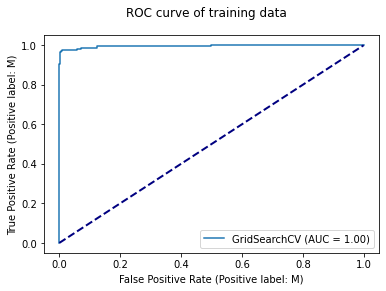

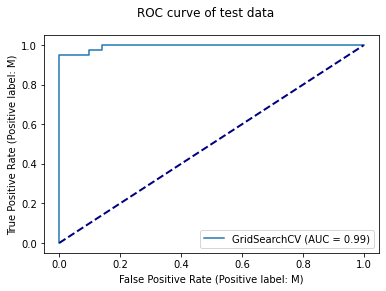

In [4]:
from sklearn.pipeline import Pipeline


# Monte-Carlo Simulation 30 times
all_list_semi = make_null_list()

print("semi-supervised learning:")


for m in range(0,30):
    X_train_raw, X_test, y_train_raw, y_test = train_test_split(x_data, y, test_size=0.2, random_state=m, stratify=y)
    X_train, X_unlabel, y_train, y_unlabel_ignore = train_test_split(X_train_raw, y_train_raw, test_size=0.5, random_state=424, stratify=y_train_raw)
    # convert dataframe to numpy
    
    X_train = X_train.values
    y_train = y_train.values.tolist()
    
    X_unlabel = X_unlabel.values
    X_label = np.empty(shape=(0, 30))
    y_label = []
    
    while X_unlabel.size !=0 :
        pipe = Pipeline([("scaler", MinMaxScaler()),
                         ("svm", LinearSVC(penalty="l1",dual=False, max_iter=10000))
                        ])
        param_grid = {'svm__C':np.logspace(-3, 6, 10)}
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
        
        if X_label.size == 0:
            X_train_new = X_train
            y_train_new = y_train
        
        grid.fit(X_train_new, y_train_new)
        
        y_pred_unlabel = grid.predict(X_unlabel)
        unlabel_dis = grid.decision_function(X_unlabel)
        
        # get the added index 
        smax = np.argmax(abs(unlabel_dis)) 
        
        #print(unlabel_dis[smax], y_pred_unlabel[smax])
        X_label = np.vstack((X_label, X_unlabel[smax]))
        y_label.append(y_pred_unlabel[smax])
        
        X_train_new = np.vstack((X_train, X_label))
        y_train_new = y_train + y_label
        
        X_unlabel = np.delete(X_unlabel, smax, axis = 0)
        
        
    index_list_semi, y_pred_train_semi, y_pred_test_semi = estimate_index(X_train_raw, X_test, y_train_raw, y_test, grid)
    all_list_semi = avg_index(index_list_semi, all_list_semi)
    
    if m == 0:
        
        print("The best parameters C of supervised learning are %s with a CV score of %0.2f" % (grid.best_params_, grid.best_score_))
        cm_train_semi = cm(y_train_raw, y_pred_train_semi)
        cm_test_semi = cm(y_test, y_pred_test_semi)
        
        print("The Confusion Matrix of train data is ")
        display(cm_train_semi)
        print("The Confusion Matrix of test data is ")
        display(cm_test_semi)
        
        
        disp_train_semi = RocCurveDisplay.from_estimator(grid, X_train_raw, y_train_raw, pos_label="M")
        disp_train_semi.figure_.suptitle("ROC curve of training data")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.show()
        
        
        disp_test_semi = RocCurveDisplay.from_estimator(grid, X_test, y_test, pos_label="M")
        disp_test_semi.figure_.suptitle("ROC curve of test data")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.show()



In [5]:
ave_2 = []
for i in range(len(all_list_semi)):
    ave_2.append(np.mean(all_list_semi[i]))
    
    
res_1["semi supervised learning"] = ave_2
display(res_1[["semi supervised learning"]])    
    

,semi supervised learning
accu_test,0.960819
accu_train,0.975971
prec_test,0.966842
prec_train,0.982522
recall_test,0.926190
recall_train,0.952941
f1_test,0.945573
f1_train,0.967322
auc_test,0.992229
auc_train,0.994426


#### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?
Answer:
adjust the n_init parameter of kmeans   
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

#### B. Compute the centers of the two clusters and ﬁnd the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1

#### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F 1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

1 Here we are using k-means as a classiﬁer. The closest 30 data points to each center are labeled by experts, so as to use k-means for classiﬁcation. Obviously, this is a na¨ıve approach.

2 K-means algorithm does not provide probabilities, so one can use the distances from cluster center and pass them through a softmax to calculate probabilities. Alternatively, one can calculate the ROC curve by varying the threshold for majority. polling Usdually, a majority is achieved when t = 50% of the data are in a class. one can vary t and obtain an ROC curve.

In [6]:
from numpy import exp
from

def get_pred_y(dd, real_y, label_predict):
    
    res = pd.DataFrame(real_y, columns = ["real_y"])
    res["cluster"] = label_predict
    
    column1 = dd[:,0]
    column2 = dd[:,1]
    
    ind1 = np.argpartition(column1, 30)[:30]
    ind2 = np.argpartition(column2, 30)[:30]
    
    y_30_1 = res.iloc[ind1]
    y_30_2 = res.iloc[ind2]
    
    # predict class name
    y_des_1 = y_30_1["real_y"].describe()["top"]
    y_des_2 = y_30_2["real_y"].describe()["top"]
    
    res.loc[res['cluster']==0,'predict_y'] = y_des_1
    res.loc[res['cluster']==1,'predict_y'] = y_des_2
    
    if y_des_1 == "M":
        m0 = 0
    else:
        m0 = 1
    
    return res, m0


def estimate_index_k(res_train, res_test, prob_train, prob_test):
    
    y_train = res_train["real_y"]
    y_pred_train = res_train["predict_y"]
    
    y_test = res_test["real_y"]
    y_pred_test = res_test["predict_y"]
    
    a_test = accuracy_score(y_test, y_pred_test)
    a_train = accuracy_score(y_train, y_pred_train)
    
    p_test = precision_score(y_test, y_pred_test, pos_label = "M")
    p_train = precision_score(y_train, y_pred_train, pos_label = "M")
    
    r_test = recall_score(y_test, y_pred_test, pos_label = "M")
    r_train = recall_score(y_train, y_pred_train, pos_label = "M")

    f1_test = f1_score(y_test, y_pred_test, pos_label = "M")
    f1_train = f1_score(y_train, y_pred_train, pos_label = "M")
    
    auc_test = roc_auc_score(y_test, prob_test)
    auc_train = roc_auc_score(y_train, prob_train)

    return [a_test, a_train, p_test, p_train, r_test, r_train, f1_test, f1_train, auc_test, auc_train]


def softmax(vector):
    e = 1/ exp(vector)
    return e / e.sum()


unsupervised learning:
The Confusion Matrix of train data is 


,predicted benign,predicted malignant
real benign,278,7
real maligant,29,141


The Confusion Matrix of test data is 


,predicted benign,predicted malignant
real benign,68,4
real maligant,6,36


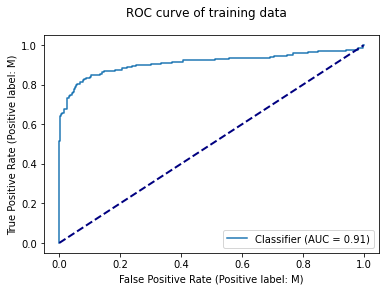

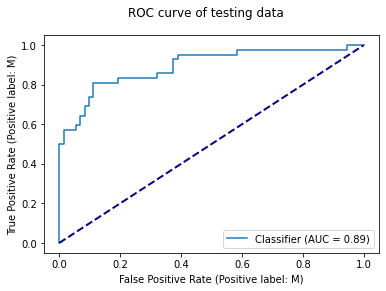

In [8]:
print("unsupervised learning:")
from sklearn.cluster import KMeans

# Monte-Carlo Simulation 30 times
all_list_un= make_null_list()


def avg_index(index_list, all_list):
    for i in range(len(index_list)):
        all_list[i].append(index_list[i])
    return all_list

for m in range(0,30):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=m, stratify=y)
    # ignore the index
    X_train, X_test = normal_data(X_train, X_test)
    y_train = y_train.values
    y_test = y_test.values

    km = KMeans(n_clusters = 2, random_state=424, n_init=10)
    km.fit(X_train)
    
    label_predict = km.labels_
    dd_train = km.transform(X_train)
    res_train, m0_train = get_pred_y(dd_train, y_train, label_predict)
    
    label_predict_test = km.predict(X_test)
    dd_test = km.transform(X_test)
    res_test, m0_test = get_pred_y(dd_test, y_test, label_predict_test)

    prob_train = softmax(dd_train[:,m0_train])
    prob_test = softmax(dd_test[:,m0_test])
    
    index_list_un = estimate_index_k(res_train, res_test, prob_train, prob_test)
    all_list_un = avg_index(index_list_un, all_list_un)

    if m == 0:
        cm_train_un = cm(res_train["real_y"], res_train["predict_y"])
        cm_test_un = cm(res_test["real_y"], res_test["predict_y"])
        print("The Confusion Matrix of train data is ")
        display(cm_train_un)
        print("The Confusion Matrix of test data is ")
        display(cm_test_un)
        
        disp_train_un = RocCurveDisplay.from_predictions(res_train["real_y"], prob_train, pos_label="M")
        disp_train_un.figure_.suptitle("ROC curve of training data")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.show()
        
        disp_test_un = RocCurveDisplay.from_predictions(res_test["real_y"], prob_test, pos_label="M")
        disp_test_un.figure_.suptitle("ROC curve of testing data")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.show()
        
        


In [9]:
ave_3 = []
for i in range(len(all_list_un)):
    ave_3.append(np.mean(all_list_un[i]))
    
    
res_1["unsupervised learning"] = ave_3
display(res_1[["unsupervised learning"]]) 

,unsupervised learning
accu_test,0.924561
accu_train,0.926081
prec_test,0.941031
prec_train,0.951386
recall_test,0.849206
recall_train,0.845686
f1_test,0.891856
f1_train,0.895254
auc_test,0.894577
auc_train,0.905692


#### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clusters have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.


Spectral Clustering:
The Confusion Matrix of train data is 


,predicted benign,predicted malignant
real benign,283,2
real maligant,78,92


The Confusion Matrix of test data is 


,predicted benign,predicted malignant
real benign,72,0
real maligant,18,24


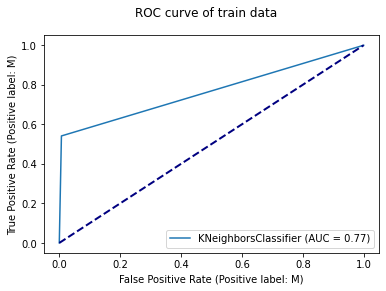

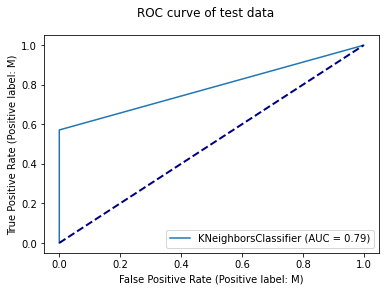

In [10]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

print("Spectral Clustering:")

def estimate_index_sc(res_train, y_test, y_pred_test):
    
    y_train = res_train["real_y"]
    y_pred_train = res_train["predict_y"]
    
    a_test = accuracy_score(y_test, y_pred_test)
    a_train = accuracy_score(y_train, y_pred_train)
    
    p_test = precision_score(y_test, y_pred_test, pos_label = "M")
    p_train = precision_score(y_train, y_pred_train, pos_label = "M")
    
    r_test = recall_score(y_test, y_pred_test, pos_label = "M")
    r_train = recall_score(y_train, y_pred_train, pos_label = "M")

    f1_test = f1_score(y_test, y_pred_test, pos_label = "M")
    f1_train = f1_score(y_train, y_pred_train, pos_label = "M")
    
    return [a_test, a_train, p_test, p_train, r_test, r_train, f1_test, f1_train]


def mannul_auc(major, res_sc):
    ratioM = {}
    
    TP_list = []
    FP_list = []
    
    for threshold in [x/10 for x in range(1,11)]:
        for c in [0, 1]:
            if major.loc[c, "top"] == 'M':
                ratioM[c] = major.loc[c, "freq"] / major.loc[c, "count"]
            else:
                ratioM[c] = 1 - (major.loc[c, "freq"] / major.loc[c, "count"])
                
            if ratioM[c] >= threshold:
                res_sc.loc[res_sc['cluster']==c,threshold] = "M"
            else:
                res_sc.loc[res_sc['cluster']==c,threshold] = "B"
        
        TP = res_sc[(res_sc[threshold]=="M") & (res_sc["real_y"]=="M")].shape[0]
        FP = res_sc[(res_sc[threshold]=="M") & (res_sc["real_y"]=="B")].shape[0]
        TP_list.append(TP)
        FP_list.append(FP)
    
    AUC_train = abs(np.trapz(TP_list/real_pos, FP_list/real_neg))
    return AUC_train

all_list_sc= make_null_list()
mannul_auc_list = []


for m in range(0,30):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=m, stratify=y)
    X_train, X_test = normal_data(X_train, X_test)
    y_train = y_train.values
    y_test = y_test.values
    
    unique, count = np.unique(y_train, return_counts=True)
    real_y_count = dict(zip(unique, count))
    real_pos = real_y_count["M"]
    real_neg = real_y_count["B"]
    
    sc = SpectralClustering(n_clusters = 2, random_state=424, n_init=10, gamma=1, affinity="rbf", n_jobs=-1)
    sc_train_label = sc.fit_predict(X_train)
    
    res_sc = pd.DataFrame(y_train, columns = ["real_y"])
    res_sc["cluster"] = sc_train_label
    major = res_sc["real_y"].groupby(res_sc["cluster"]).describe()

    res_sc.loc[res_sc['cluster']==0,'predict_y'] = major.loc[0, "top"]
    res_sc.loc[res_sc['cluster']==1,'predict_y'] = major.loc[1, "top"]
    
    auc_train1 = mannul_auc(major, res_sc)
    #print("auc1", auc_train1)
    mannul_auc_list.append(auc_train1)
    
    
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    knn.fit(X_train, res_sc["predict_y"])
    y_pred_test = knn.predict(X_test)
    index_sc_list = estimate_index_sc(res_sc, y_test, y_pred_test)
    
    auc_train2 = roc_auc_score(y_train, knn.predict_proba(X_train)[:,1])
    auc_test = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
    #print("auc2", auc_train2)
    
    index_sc_list.append(auc_test)
    index_sc_list.append(auc_train2)
    
    all_list_sc = avg_index(index_sc_list, all_list_sc)
    
    if m==0:
        cm_train_sc = cm(res_sc["real_y"], res_sc["predict_y"])
        cm_test_sc = cm(y_test, y_pred_test)
        print("The Confusion Matrix of train data is ")
        display(cm_train_sc)
        print("The Confusion Matrix of test data is ")
        display(cm_test_sc)
        
        disp_train_sc = RocCurveDisplay.from_estimator(knn, X_train, y_train, pos_label="M")
        disp_train_sc.figure_.suptitle("ROC curve of train data")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.show()
        
        disp_train_sc = RocCurveDisplay.from_estimator(knn, X_test, y_test, pos_label="M")
        disp_train_sc.figure_.suptitle("ROC curve of test data")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.show()
        


In [11]:
ave_4 = []
for i in range(len(all_list_sc)):
    ave_4.append(np.mean(all_list_sc[i]))
    
    
res_1["Spectral Clustering"] = ave_4
display(res_1[["Spectral Clustering"]]) 

,Spectral Clustering
accu_test,0.865497
accu_train,0.862344
prec_test,0.995523
prec_train,0.980199
recall_test,0.638095
recall_train,0.644706
f1_test,0.774551
f1_train,0.776668
auc_test,0.818122
auc_train,0.818435


#### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled. One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

#### ANSWER：
##### Yes, from the result table below, we can come to a conclusion that supervised learning works better than semi-supervised learning while semi-supervised learning works better than unsupervised learning.

In [12]:
display(res_1)

,supervised learning,semi supervised learning,unsupervised learning,Spectral Clustering
accu_test,0.965789,0.960819,0.924561,0.865497
accu_train,0.984982,0.975971,0.926081,0.862344
prec_test,0.971728,0.966842,0.941031,0.995523
prec_train,0.989023,0.982522,0.951386,0.980199
recall_test,0.934921,0.926190,0.849206,0.638095
recall_train,0.970588,0.952941,0.845686,0.644706
f1_test,0.952528,0.945573,0.891856,0.774551
f1_train,0.979697,0.967322,0.895254,0.776668
auc_test,0.992769,0.992229,0.894577,0.818122
auc_train,0.997507,0.994426,0.905692,0.818435
